## Explotory Data Analysis

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre
from sklearn.metrics import r2_score #for r-squared

In [3]:
import glob

path = '/Users/Farid/Downloads/woolsey-selected/'

# Get a list of all filenames that match the pattern
filenames = glob.glob(path + 'd07_text_station_5min_2018_*.txt')
print('filenames: ', filenames)
print('filenames: ', len(filenames))

# Initialize an empty list to hold the dataframes
data = []

for filename in filenames:
    # Read each file into a dataframe
    df = pd.read_csv(filename, header=None)
    
    # Set the column names
    
    df.columns = ['Time', 'Sensor', 'District', 'Fwy'] + [f'{col_num}' for col_num in range(5, df.shape[1] + 1)]
    
    # Append the dataframe to the list
    data.append(df)
    print('Done with file',len(data))


# Concatenate all dataframes in the list into a single dataframe
data = pd.concat(data, ignore_index=True)

filenames:  ['/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_27.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_26.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_24.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_30.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_18.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_19.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_31.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_25.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_09.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_21.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_20.txt', '/Users/Farid/Downloads/woolsey-selected/d07_text_station_5min_2018_10_08.txt', '/Users/Farid/Downloads/woo

In [4]:
data

,Time,Sensor,District,Fwy,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,10/27/2018 00:00:00,715898,7,5,S,ML,0.43,0,0,150.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,10/27/2018 00:00:00,715900,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,10/27/2018 00:00:00,715901,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,10/27/2018 00:00:00,715903,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
4,10/27/2018 00:00:00,715906,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44695413,10/16/2018 23:55:00,776458,7,101,N,FR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
44695414,10/16/2018 23:55:00,776459,7,101,N,OR,NaN,10,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
44695415,10/16/2018 23:55:00,776465,7,101,N,ML,0.53,40,100,99.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
44695416,10/16/2018 23:55:00,776469,7,134,E,FF,NaN,18,100,18.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [ ]:
data.shape

In [5]:
n_sensors = data['Sensor'].unique().shape[0]
print('n_sensors: ', n_sensors,"\n")
n_points = data.shape[0]
print('n_points: ', n_points,"\n")
print('measurements per sensor: ', n_points/n_sensors)

n_sensors:  4865 

n_points:  44695418 

measurements per sensor:  9187.13627954779


In [6]:
sensor_id = 764632


sensor_interest = data[data['Sensor'] == sensor_id].dropna(axis=1)

## sensor_interest.columns[10] == "Traffic"


# Sort DataFrame by 'Time' column
sensor_interest.sort_values('Time', inplace=True)
sensor_interest

,Time,Sensor,District,Fwy,5,6,7,8,9,10,...,27,28,29,30,31,32,37,42,47,52
36316678,10/01/2018 00:00:00,764632,7,101,S,ML,0.56,40,100,68.0,...,1,10.0,14.0,0.0169,62.8,1,0,0,0,0
36321531,10/01/2018 00:05:00,764632,7,101,S,ML,0.56,40,100,67.0,...,1,10.0,15.0,0.0239,59.3,1,0,0,0,0
36326384,10/01/2018 00:10:00,764632,7,101,S,ML,0.56,40,100,66.0,...,1,10.0,10.0,0.0118,61.1,1,0,0,0,0
36331237,10/01/2018 00:15:00,764632,7,101,S,ML,0.56,40,100,45.0,...,1,10.0,8.0,0.0085,62.2,1,0,0,0,0
36336090,10/01/2018 00:20:00,764632,7,101,S,ML,0.56,40,100,55.0,...,1,10.0,14.0,0.0157,62.9,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20924922,11/01/2018 23:35:00,764632,7,101,S,ML,0.56,40,100,92.0,...,1,10.0,18.0,0.0334,58.9,1,0,0,0,0
20929770,11/01/2018 23:40:00,764632,7,101,S,ML,0.56,40,100,73.0,...,1,10.0,18.0,0.0308,59.0,1,0,0,0,0
20934618,11/01/2018 23:45:00,764632,7,101,S,ML,0.56,40,100,89.0,...,1,10.0,18.0,0.0319,58.2,1,0,0,0,0
20939466,11/01/2018 23:50:00,764632,7,101,S,ML,0.56,36,100,93.0,...,1,9.0,19.0,0.0367,55.4,1,0,0,0,0


/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_8508/1147384866.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])


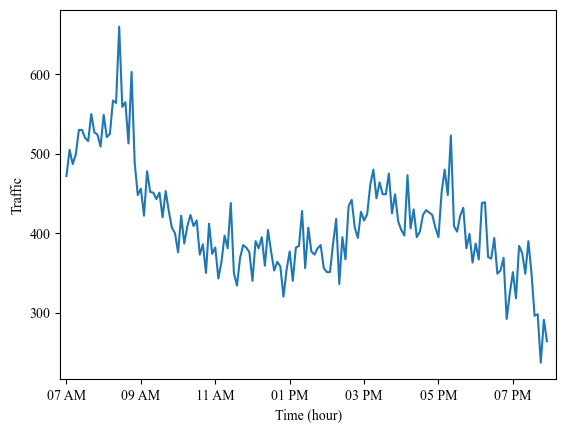

In [7]:
import matplotlib.dates as mdates
from matplotlib import rc

day = "10/01"


# Set default font to 'Times New Roman'
rc('font', family='Times New Roman')


time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]

# Ensure 'Time' column is in datetime format
time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

# Filter out data outside of 7 AM to 7 PM
time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

# y values
traffic = time_series_data['10']

# x values - use 'Time' values
time = time_series_data['Time']

fig, ax = plt.subplots()

# Create scatter plot
ax.plot(time, traffic)

# Set x-axis format and locator
hours = mdates.DateFormatter('%I %p')
hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
ax.xaxis.set_major_locator(hour_locator)
ax.xaxis.set_major_formatter(hours)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
end_time = time.max().replace(hour=20, minute=10, second=0)
ax.set_xlim(start_time, end_time)

# Set axis titles
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')

plt.show()
